In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd        
from math import sqrt
import networkx as nx
import adjmatrix
import numpy as np 

In [2]:
concr_data = pd.read_csv('C:/Users/Eva Martin/OneDrive - UAM/Documentos/MorenoHerreroLab/Estancia/CONCR_test_FMH/output_4/all_disordered_segment_statistics.csv')
concr_data.head(20)

,image,threshold,grain_number,index,branch_distance,branch_type,connected_segments,mean_pixel_value,stdev_pixel_value,min_value,median_value,middle_value,basename
0,1,above,0,0,14.787240,1,"[1, 2]",0.600997,0.059646,0.479759,0.628742,0.643032,..\CONCR_test_FMH\stp_files
1,1,above,0,1,33.174373,2,"[0, 2, 5, 6]",0.531793,0.175295,0.209047,0.507949,0.244502,..\CONCR_test_FMH\stp_files
2,1,above,0,2,8.453958,2,"[0, 1, 3, 4]",0.437767,0.097775,0.323294,0.433644,0.332054,..\CONCR_test_FMH\stp_files
3,1,above,0,3,11.146692,1,"[2, 4]",0.570466,0.037101,0.491929,0.571744,0.537611,..\CONCR_test_FMH\stp_files
4,1,above,0,4,10.979140,1,"[2, 3]",0.378557,0.081793,0.268611,0.362868,0.291852,..\CONCR_test_FMH\stp_files
5,1,above,0,5,26.101483,1,"[1, 6]",0.513864,0.130388,0.309775,0.537786,0.340046,..\CONCR_test_FMH\stp_files
6,1,above,0,6,6.096328,1,"[1, 5]",0.645513,0.049060,0.551328,0.656729,0.673468,..\CONCR_test_FMH\stp_files
7,10,above,0,0,30.747341,2,"[1, 2, 3, 4]",0.655874,0.226344,0.186009,0.755012,0.847642,..\CONCR_test_FMH\stp_files
8,10,above,0,1,15.624998,1,"[0, 2]",0.724401,0.066720,0.620207,0.757995,0.711194,..\CONCR_test_FMH\stp_files
9,10,above,0,2,14.885389,2,"[0, 1, 4, 5]",0.645059,0.056326,0.566586,0.638917,0.583452,..\CONCR_test_FMH\stp_files


In [3]:
# Agrupa por 'image' y 'grain_number'
grouped = concr_data.groupby(['image', 'grain_number'])


# Inicializar listas para almacenar los subconjuntos
all_branch_types = []
branch_distances= []
all_indexes = []
all_connected_segments = []
images = []
# Itera por cada grupo
for (image_val, grain_val), group_df in grouped:
    print(f"Grupo: Image = {image_val}, Grain = {grain_val}")
    #print(group_df["index"])  # Aquí tienes cada subconjunto
    branch_types = group_df['branch_type'].tolist()
    indexes = group_df['index'].tolist()
    connected_segments = group_df['connected_segments'].tolist()
    branch_distance = group_df['branch_distance'].tolist()
    image = group_df['image'].tolist()

    all_branch_types.append(branch_types)
    all_indexes.append(indexes)
    all_connected_segments.append(connected_segments)
    branch_distances.append(branch_distance)
    images.append(image)
    # Aquí podrías hacer lo que necesites con cada grupo, por ejemplo:
    # group_df.to_csv(f"image_{image_val}_grain_{grain_val}.csv", index=False)
print(len(all_indexes))

Grupo: Image = 1, Grain = 0
Grupo: Image = 2, Grain = 0
Grupo: Image = 3, Grain = 0
Grupo: Image = 4, Grain = 0
Grupo: Image = 5, Grain = 0
Grupo: Image = 6, Grain = 0
Grupo: Image = 7, Grain = 0
Grupo: Image = 8, Grain = 0
Grupo: Image = 9, Grain = 0
Grupo: Image = 10, Grain = 0
Grupo: Image = 11, Grain = 0
Grupo: Image = 11, Grain = 1
Grupo: Image = 11, Grain = 2
Grupo: Image = 11, Grain = 3
Grupo: Image = 11, Grain = 4
Grupo: Image = 12, Grain = 0
Grupo: Image = 13, Grain = 0
Grupo: Image = 14, Grain = 0
Grupo: Image = 15, Grain = 0
Grupo: Image = 16, Grain = 0
Grupo: Image = 17, Grain = 0
Grupo: Image = 18, Grain = 0
Grupo: Image = 19, Grain = 0
Grupo: Image = 20, Grain = 0
Grupo: Image = 21, Grain = 0
Grupo: Image = 22, Grain = 0
Grupo: Image = 23, Grain = 0
Grupo: Image = 24, Grain = 0
Grupo: Image = 25, Grain = 0
Grupo: Image = 26, Grain = 0
Grupo: Image = 27, Grain = 0
Grupo: Image = 27, Grain = 1
Grupo: Image = 27, Grain = 2
Grupo: Image = 28, Grain = 0
Grupo: Image = 28, Grai

In [4]:
print(branch_distances)

[[14.787239946023073, 33.17437347978215, 8.45395815662705, 11.146691519354782, 10.979139904598998, 26.10148308013364, 6.096328023410881], [27.482550837112186, 13.74127541855609, 0.9765623762376238, 6.263879638166664, 5.287317261929039], [40.917470338453775, 6.096328023410881, 29.43567558958743, 6.668385018907584, 25.292472318651797], [37.4157262142442, 18.456535684988427, 17.982628153018148, 16.907916313254102, 4.310754885691416], [21.79072819444222, 19.600649675981835, 0.9765623762376238, 41.96343486592076, 7.881901161130346], [12.764713042318466, 4.310754885691416, 27.817654066623746, 56.65252534841741, 6.668385018907584], [5.859374257425743, 11.788150666080842, 22.767290570679844, 22.36278518993892, 39.50765526917817], [10.57463452385808, 6.835936633663367, 18.288984070232647, 12.76471304231847, 7.81249900990099, 28.291561598594026, 15.694400171031337], [9.598072147620456, 13.978229184541233, 17.884478689491726, 69.04148032229202, 19.363695909996693], [30.747341195336613, 15.6249980

Loop: We compate all adjancecy matrices in our list. first one with the n-1. then second one with n-2. so on and so forth. 
In each comparison iteration: 
    If they are isomorphic: compare and save adjancency matrix in dictionary with key the group number. 
    
    First the dict will be empty. 
    
    Then we will have to compare. 
    
    FIRST see if our matrix/es are already in one groupe. 
        If not,  will need to compare our couple (one of them) to each group existing in the dict. 
        If is isomorphic to one then we put our couple in that group. 
        if not create a new one. We increase one counter. move to next
    Else: they are not isomorphic and move to next.
If counter == 0 and matrix is not already in one gropup == create a new group for only this one. 

In [5]:
def str2list(string):
    array = list(np.fromstring(string[1:-1], dtype=int, sep=','))
    return array 


In [6]:
print(list(range(1,9)))

[1, 2, 3, 4, 5, 6, 7, 8]


In [7]:
#create empty dict 
classification = {}
indexes_grouped = {}

# Inizialize the dict, do firt iteration 
indexes = all_indexes[0]
connected_branches_0 = all_connected_segments[0]
weigths_0 = branch_distances[0]

array_connected_branches0 = [str2list(connected_branches_0[index]) for index in indexes] #list of np arrays 
eje_a_nodos0 = adjmatrix.procesar_segmentos(array_connected_branches0, all_branch_types[0])
      
j = len(eje_a_nodos0)
list_nx0=[]
for h in range(j):
    n1,n2 = eje_a_nodos0[h]
    list_nx0.append((n1,n2,weigths_0[h]))


Gw0 = nx.Graph()
Gw0.add_weighted_edges_from(list_nx0)
M0= nx.adjacency_matrix(Gw0,nodelist=list(range(1,len(Gw0)+1))).toarray()
classification["Group_0"] = [M0]
indexes_grouped["Group_0_index"] =[1]


for m in range(1, len(all_indexes)):
    indexes2 = all_indexes[m]
    branch_type2 = all_branch_types[m]
    connected_branches2 = all_connected_segments[m]
    weigths2 = branch_distances[m]

    array_connected_branches2 = [str2list(connected_branches2[index]) for index in indexes2] #list of np arrays 
    eje_a_nodos2 = adjmatrix.procesar_segmentos(array_connected_branches2, branch_type2)
    
    # insert here code for comparing         
    j = len(eje_a_nodos2)
    list_nx2=[]
    for h in range(j):
        n1,n2 = eje_a_nodos2[h]
        list_nx2.append((n1,n2,weigths2[h]))

    Gw2 = nx.Graph()
    Gw2.add_weighted_edges_from(list_nx2)

    tf = nx.is_isomorphic(Gw0, Gw2, node_match=None, edge_match=None)
    # here code to save in dict. 
    if tf == True:
        M1,M2 = adjmatrix.find_adj_matrix(Gw0,Gw2)
        classification["Group_0"].append(M2)
        indexes_grouped["Group_0_index"].append(m+1)

possible mistake in graph


In [8]:
print(indexes_grouped["Group_0_index"])

[1, 8, 27, 28, 31, 37, 44, 50, 58, 65, 87, 88, 89, 114, 116, 126, 132, 138, 142, 151, 157, 175]


In [9]:

group_counter = 0
for n in range(1,len(all_indexes)):
    indexes = all_indexes[n]
    branch_type = all_branch_types[n]
    connected_branches = all_connected_segments[n]
    weigths = branch_distances[n]

    array_connected_branches = [str2list(connected_branches[index]) for index in indexes] #list of np arrays 
    eje_a_nodos = adjmatrix.procesar_segmentos(array_connected_branches, branch_type)

    i = len(eje_a_nodos)
    list_nx=[]
    for h in range(i):
        n1,n2 = eje_a_nodos[h]
        list_nx.append((n1,n2,weigths[h]))
    Gw = nx.Graph()
    Gw.add_weighted_edges_from(list_nx)


    #chech if belong to one group (just isomorph)
    one_true=False
    for k, v in indexes_grouped.items():
        ind = n+1
        if ind in v:
            one_true =True
            
    if one_true == True:
        pass
    else: 
        group_counter = group_counter + 1
        indexes_grouped[f"Group_{group_counter}_index"] =[n]
        M1= nx.adjacency_matrix(Gw,nodelist=list(range(1,len(Gw)+1))).toarray()
        classification[f"Group_{group_counter}"] = [M1]
        indexes_grouped[f"Group_{group_counter}_index"] =[n+1]


        for m in range(n+1, len(all_indexes)):
            indexes2 = all_indexes[m]
            branch_type2 = all_branch_types[m]
            connected_branches2 = all_connected_segments[m]
            weigths2 = branch_distances[m]

            array_connected_branches2 = [str2list(connected_branches2[index]) for index in indexes2] #list of np arrays 
            eje_a_nodos2 = adjmatrix.procesar_segmentos(array_connected_branches2, branch_type2)
                        
            j = len(eje_a_nodos2)
            list_nx2=[]
            for h in range(j):
                n1,n2 = eje_a_nodos2[h]
                list_nx2.append((n1,n2,weigths2[h]))

            Gw2 = nx.Graph()
            Gw2.add_weighted_edges_from(list_nx2)

            tf = nx.is_isomorphic(Gw, Gw2, node_match=None, edge_match=None)
            if tf == True:
                M1,M2 = adjmatrix.find_adj_matrix(Gw,Gw2)
                classification[f"Group_{group_counter}"].append(M2)
                indexes_grouped[f"Group_{group_counter}_index"].append(m+1)




possible mistake in graph
possible mistake in graph
possible mistake in graph
possible mistake in graph
possible mistake in graph
possible mistake in graph
possible mistake in graph
possible mistake in graph


In [10]:
total = 0
for k,v in indexes_grouped.items():
    print(v)
    total = total + len(v)
print(total)
print(classification.keys())


[1, 8, 27, 28, 31, 37, 44, 50, 58, 65, 87, 88, 89, 114, 116, 126, 132, 138, 142, 151, 157, 175]
[2, 3, 4, 5, 6, 7, 9, 12, 15, 17, 19, 20, 22, 23, 26, 29, 30, 33, 35, 41, 45, 47, 49, 53, 56, 57, 60, 62, 64, 66, 68, 72, 74, 76, 78, 80, 82, 83, 84, 86, 90, 91, 92, 93, 96, 97, 98, 101, 106, 108, 110, 115, 117, 118, 119, 120, 121, 123, 124, 125, 128, 133, 135, 136, 137, 139, 140, 146, 147, 149, 150, 152, 154, 155, 156, 158, 166, 167, 169, 171, 176]
[10]
[11]
[13]
[14, 75, 161]
[16]
[18, 24, 25, 38, 39, 42, 46, 48, 51, 52, 54, 55, 59, 70, 73, 79, 81, 94, 95, 99, 102, 104, 105, 109, 111, 112, 122, 127, 129, 131, 134, 143, 145, 148, 153, 162, 164, 165, 168, 170, 172]
[21]
[32]
[34]
[36, 40, 43, 61, 71, 103, 107, 113, 130, 141, 160, 163, 173, 174, 177]
[63]
[67]
[69, 144]
[77]
[85, 100]
[159]
177
dict_keys(['Group_0', 'Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7', 'Group_8', 'Group_9', 'Group_10', 'Group_11', 'Group_12', 'Group_13', 'Group_14', 'Group_15', 'Group_1

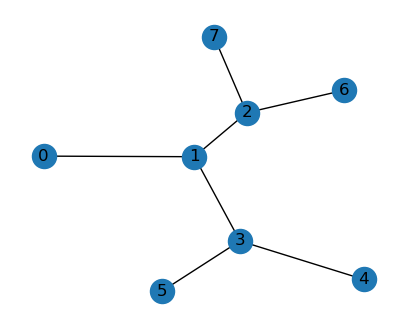

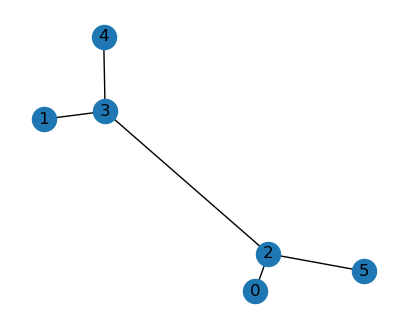

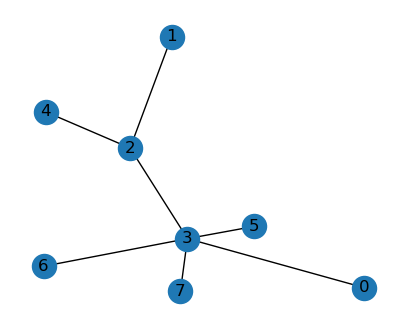

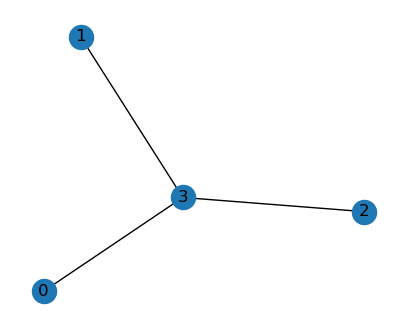

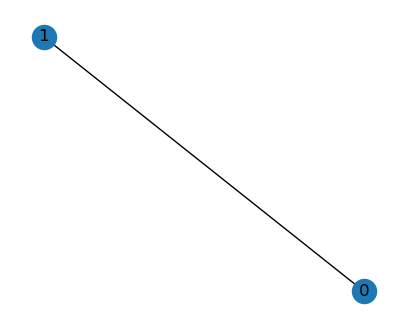

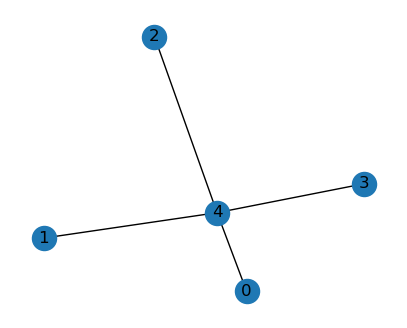

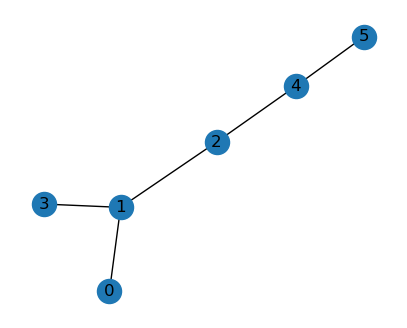

In [11]:

for k,v in classification.items():
    if len(v) >1:
        fig, ax = plt.subplots(figsize=(5,4))
        Gw = nx.from_numpy_array(v[0])
        # Nodos y vonexiones
        nx.draw(Gw, with_labels=True, ax=ax) 


[[ 0.          0.          0.         27.77327995]
 [ 0.          0.          0.         13.88629011]
 [ 0.          0.          0.         42.56046946]
 [27.77327995 13.88629011 42.56046946  0.        ]]
{(0, 3): 27.773279950989174, (1, 3): 13.886290109421507, (2, 3): 42.56046946395811}


{(0, 3): Text(0.4131407673494735, -0.13548398925305516, '27.77'),
 (1, 3): Text(0.15201460146874102, 0.2924604696437176, '13.89'),
 (2, 3): Text(-0.4348446311817855, -0.04552245578974141, '42.56')}

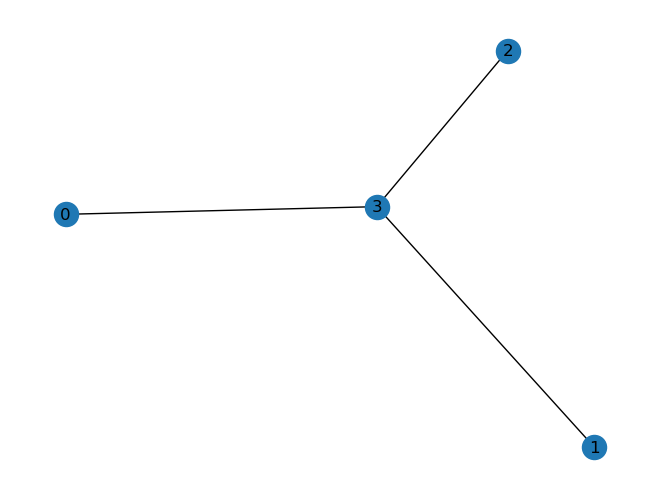

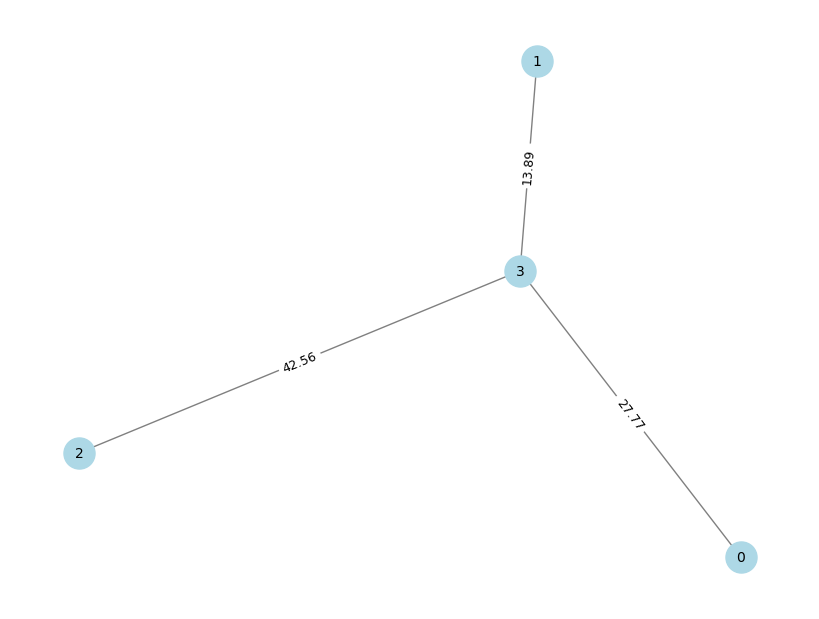

In [23]:

values = classification["Group_7"]
suma = np.sum(values,axis = 0)
mean = suma/len(values)
print(mean)

DG = nx.from_numpy_array(mean, create_using=nx.Graph) #nodelist=[1,2,3,4,5,6] ??


DG.edges(data=True)
nx.draw(DG,with_labels=True) 
edge_weights = nx.get_edge_attributes(DG, 'weight')
print(edge_weights)

# Usar el layout Kamada-Kawai que respeta las distancias
pos = nx.kamada_kawai_layout(DG, weight='weight')

# Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw(DG, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

# Agregar los pesos de los ejes como etiquetas
edge_labels = {dupl: f"{w:.2f}" for dupl, w in edge_weights.items()}
#edge_labels = {edge: f"{weight:.2f}" for edge, weight in edge_weights.items()}
nx.draw_networkx_edge_labels(Gw2, pos, edge_labels=edge_labels, font_size=9)